## IS 733
### Homework 3
#### - Vinay Krishna Kumar

#### For this homework, we will use the Old Faithful Geyser dataset, which you can download here. This dataset describes the properties of eruptions of the Old Faithful geyser, located in Yellowstone National Park, Wyoming, USA. There are two numeric attributes per instance: the length of time of the eruption, in minutes, and the waiting time until the next eruption, also in minutes. The geyser was named “Old Faithful” because its eruption patterns are very reliable.

#### a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.)

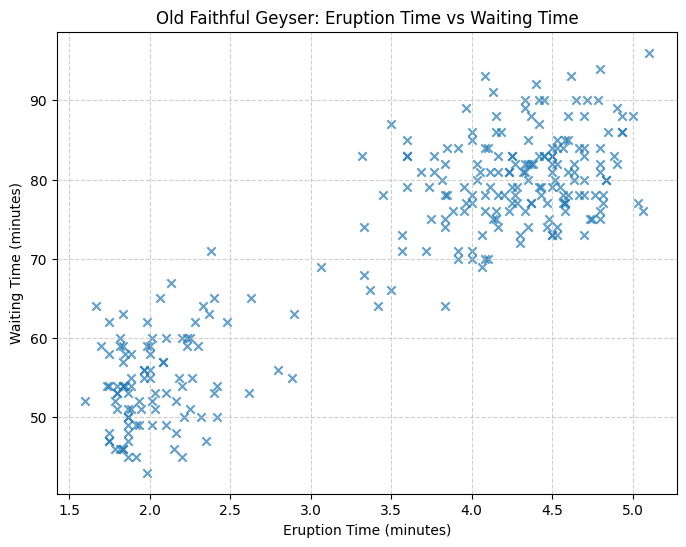

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

path = "D:/IS 733/HW3/faithful.csv"
data = pd.read_csv(path)

plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.7, marker='x')
plt.title('Old Faithful Geyser: Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### b) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters.

There are two clusters in this scatter plots
- Cluster 1 - Centered around eruption time 1.5 to 2.5 minutes and waiting time 50 to 70 minutes
- Cluster 2 - Centered around eruption time 4 to 5 minutes and waiting time 70 to 90 minutes

#### c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? 

- First, make each instance in the dataset into a trivial mini-cluster
- Then, find the two closest clusters and merge them; repeat
- Clustering stops when all clusters have been merged into a single cluster

In Hierarchical cluster algorithm uses multiple ways to find the distance between the clusters, namely
- Single Linkage
- Complete Linkage
- Average Linkage
- Centroid Linkage
- Medoid Linkage
  
Based on the scatter plot it would be appropriate to use hierarchical clustering algorithm.

#### Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers. In your notebook, including the following items:
#### (a) Your source code for the k-means algorithm. You need to implement the algorithm from scratch

In [32]:
import numpy as np
X = data[['eruptions', 'waiting']].values

class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Randomly initialize cluster centers
        np.random.seed(42)
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.history = []
        
        for i in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Compute new centers
            new_centers = self._compute_centers(X)
            
            # Compute the objective function
            objective_value = self._objective_function(X)
            self.history.append(objective_value)
            
            # Check for convergence
            if np.linalg.norm(new_centers - self.centers) < self.tol:
                break
            
            self.centers = new_centers

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)
        return np.argmin(distances, axis=1)
    
    def _compute_centers(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
    
    def _objective_function(self, X):
        return sum(np.linalg.norm(X[self.labels == k] - center) ** 2 
                   for k, center in enumerate(self.centers))
    
    def predict(self, X):
        return self._assign_clusters(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

#### (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. 

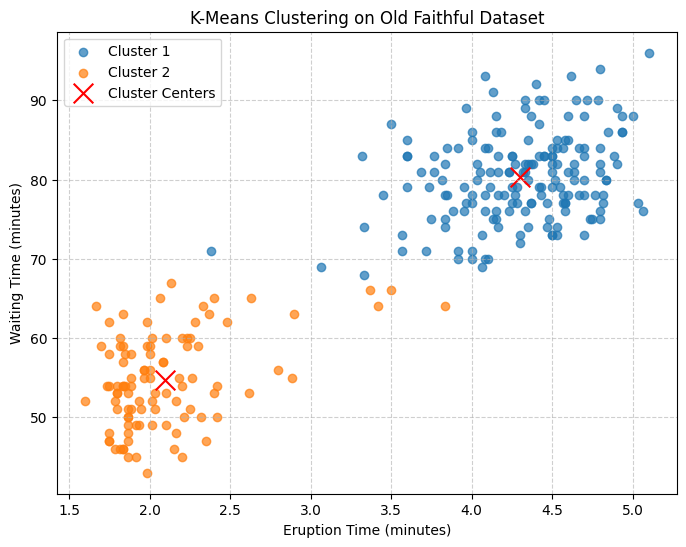

In [38]:
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_points = X[kmeans.labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}', alpha=0.7)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering on Old Faithful Dataset')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### c) A plot of the k-means objective function versus iterations of the algorithm.

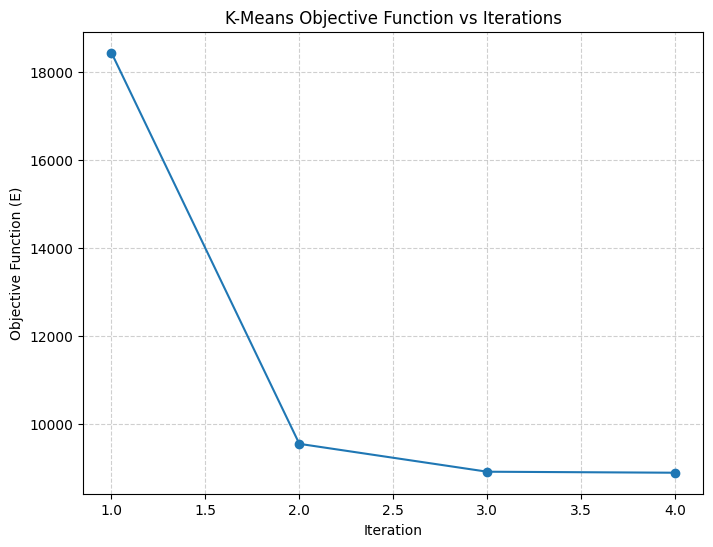

In [16]:
# Plot of the K-means objective function vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(kmeans.history) + 1), kmeans.history, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function (E)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### d) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?

Yes, this method was identified two clusters similar to the range in the answer of the Question 1.
- Cluster 1 - Centered around eruption time 1.5 to 2.5 minutes and waiting time 50 to 70 minutes
- Cluster 2 - Centered around eruption time 4 to 5 minutes and waiting time 70 to 90 minutes